<a href="https://colab.research.google.com/github/Gabriela-Reiss/CP1---IA/blob/main/CP1_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados**

### **Dataset:**  Individual Household Electric Power Consumption

Referência: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption




### **Parte 1**

**1- Carregando dataset e visualizando os dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("household_power_consumption.txt",
                 sep=";",
                 na_values="?",
                 low_memory=False)

In [ ]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


**2- Diferença entre as variáveis Global_active_power e Global_reactive_power**

**Explicação:** A variável global_active_power mostra a energia elétrica que realmente está sendo usada pelos aparelhos em casa, ou seja, o consumo real. Já a global_reactive_power representa a energia que circula no sistema, mas não é aproveitada pelos equipamentos, servindo mais para manter o funcionamento da rede elétrica.

**3-** Verificando a existência de valores ausentes no dataset

In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,3940
Global_reactive_power,3940
Voltage,3940
Global_intensity,3940
Sub_metering_1,3940
Sub_metering_2,3940
Sub_metering_3,3940


**4- Convertendo a coluna Date para o tipo DateTime e criando uma nova coluna com o dia da semana correspondente**

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Day_of_week"] = df["Date"].dt.day_name()
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_week
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday


**5- Filtrando os registros apenas do ano de 2007 e calculando a média de consumo diário de Global_active_power**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_2007 = df[df["Date"].dt.year == 2007]
media_diaria = df_2007.groupby("Date")["Global_active_power"].mean()
media_diaria.head()

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


**6- Gerando gráfico de linha mostrando a variação de Global_active_power em um único dia à escolha própria**

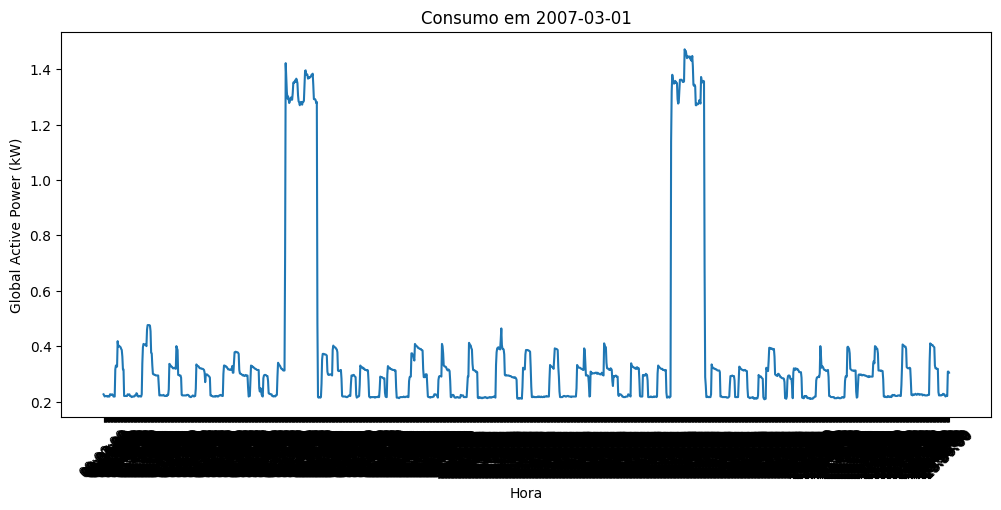

In [ ]:
dia = "2007-03-01"
df_dia = df_2007[df_2007["Date"] == dia]

plt.figure(figsize=(12,5))
plt.plot(df_dia["Time"], df_dia["Global_active_power"])
plt.title(f"Consumo em {dia}")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.xticks(rotation=45)
plt.show()

**7- Criando um histograma da coluna "Voltagem"**

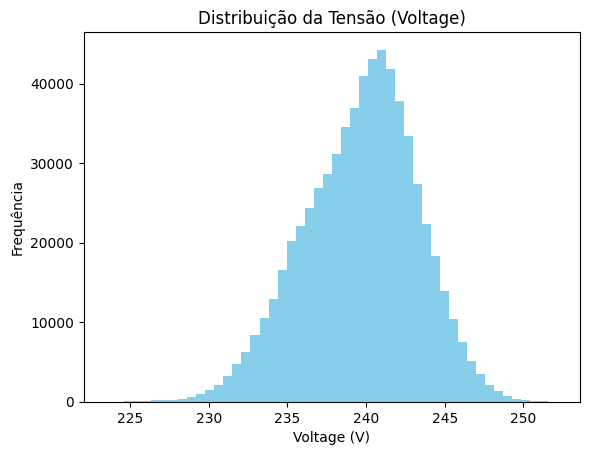

In [ ]:
plt.hist(df["Voltage"].dropna(), bins=50, color="skyblue")
plt.title("Distribuição da Tensão (Voltage)")
plt.xlabel("Voltage (V)")
plt.ylabel("Frequência")
plt.show()

**O que pode ser observado sobre a distribuição da Voltagem no histograma?**

**Explicação:** O histograma mostra que a Voltage tem uma distribuição concentrada em torno de 240 V, com formato parecido a uma curva normal. Isso significa que a maior parte dos valores de tensão está próxima de 240 V, enquanto valores muito abaixo de 230 V ou acima de 250 V são bem menos frequentes

**8- Calculando o consumo médio por mês em todo o período disponível no dataset**

In [ ]:
df["YearMonth"] = df["Date"].dt.to_period("M")
media_mensal = df.groupby("YearMonth")["Global_active_power"].mean()
media_mensal.head()

,Global_active_power
YearMonth,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189


**9- Identifique o dia com maior consumo de energia ativa global (Global_active_power)**

In [ ]:
# Verificando tipos de dados de cada coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652248 entries, 0 to 652247
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype    
---  ------                 --------------   -----    
 0   Date                   652248 non-null  object   
 1   Time                   652248 non-null  object   
 2   Global_active_power    648308 non-null  float64  
 3   Global_reactive_power  648308 non-null  float64  
 4   Voltage                648308 non-null  float64  
 5   Global_intensity       648308 non-null  float64  
 6   Sub_metering_1         648308 non-null  float64  
 7   Sub_metering_2         648308 non-null  float64  
 8   Sub_metering_3         648308 non-null  float64  
 9   Day_of_week            652248 non-null  object   
 10  YearMonth              652248 non-null  period[M]
dtypes: float64(7), object(3), period[M](1)
memory usage: 54.7+ MB


In [ ]:
df["Global_active_power"] = pd.to_numeric(df['Global_active_power'], errors='coerce')

energia_diaria = df.groupby("Date")["Global_active_power"].sum() / 60

maior_dia = energia_diaria.idxmax()
maior_valor = energia_diaria.max()

print(f"O dia com maior consumo foi {maior_dia} com {maior_valor:.2f} Kwh")

O dia com maior consumo foi 2006-12-23 com 79.56 Kwh


**10 - Comparando o consumo médio de energia ativa global em dias de semana X dias de finais de semana**

In [ ]:
df["final_semana"] = df["Day_of_week"].isin(["Saturday", "Sunday"])

media_diaria = df.groupby(["Date", "final_semana"])["Global_active_power"].sum() / 60

media_diaria_semana = media_diaria.loc[media_diaria.index.get_level_values("final_semana") == False].mean()
media_diaria_final_semana = media_diaria.loc[media_diaria.index.get_level_values("final_semana") == True].mean()

print(f"Consumo médio em dias de semana: {media_diaria_semana:.2f} kWh")
print(f"Consumo médio em finais de semana: {media_diaria_final_semana:.2f} kWh")



Consumo médio em dias de semana: 26.12 kWh
Consumo médio em finais de semana: 32.40 kWh


**11- Calculando a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity**





In [ ]:
cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
correlacoes = df[cols].corr()
print(correlacoes)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.262670 -0.372097   
Global_reactive_power             0.262670               1.000000 -0.119303   
Voltage                          -0.372097              -0.119303  1.000000   
Global_intensity                  0.999093               0.277551 -0.382920   

                       Global_intensity  
Global_active_power            0.999093  
Global_reactive_power          0.277551  
Voltage                       -0.382920  
Global_intensity               1.000000  


**12- Criando uma nova variável chamada Total_Sub_metering que soma Sub_metering_1, Sub_metering_2 e Sub_metering_3**

In [ ]:
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]].head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0


**13- Verificando se há algum mês em que o Total_Sub_metering ultrapassa a média de Global_active_power**

In [ ]:
df["Meses"] = df["Date"].dt.to_period("M")

media_diaria_active_power = df["Global_active_power"] / 60

# agrupando por mês
media_mensal_sub = df.groupby("Meses")["Total_Sub_metering"].sum()
media_mensal_active = df.groupby("Meses")["Global_active_power"].mean() / 60


comparador = media_mensal_sub > media_mensal_active

print(comparador[comparador])

Meses
2006-12    True
2007-01    True
2007-02    True
2007-03    True
2007-04    True
2007-05    True
2007-06    True
2007-07    True
2007-08    True
2007-09    True
2007-10    True
2007-11    True
2007-12    True
2008-01    True
2008-02    True
2008-03    True
Freq: M, dtype: bool


**14- Fazendo um gráfico de série temporal do Voltage para o ano de 2008**

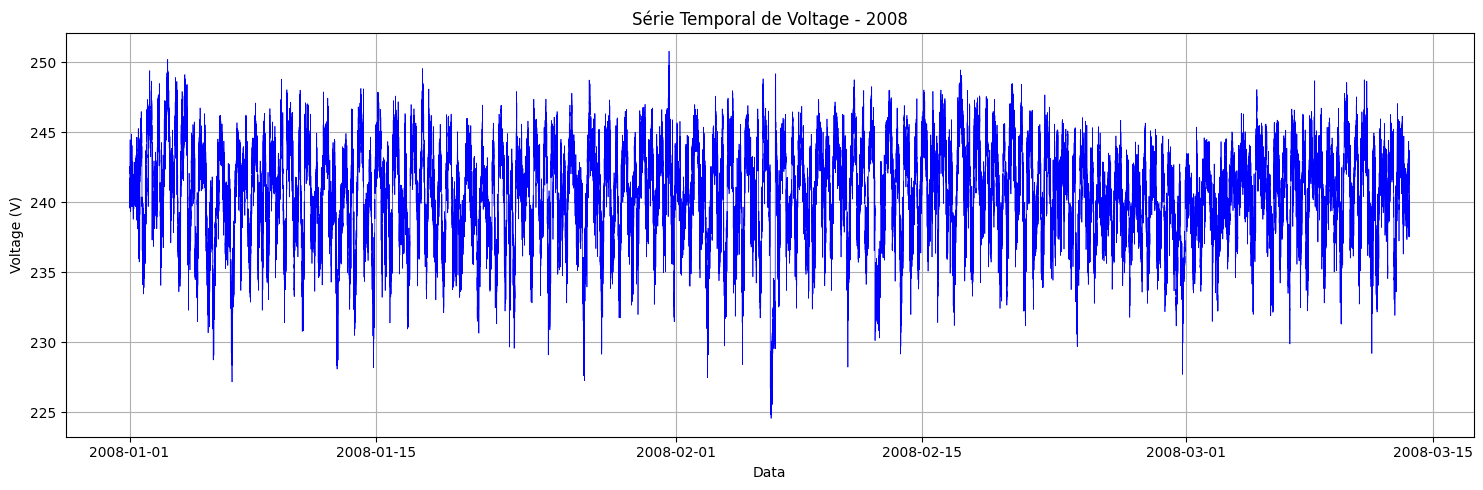

In [ ]:
df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"])

df_2008 = df[df["DateTime"].dt.year == 2008]

plt.figure(figsize=(15,5))
plt.plot(df_2008["Datetime"], df_2008["Voltage"], color="blue", linewidth=0.5)
plt.title("Série Temporal de Voltage - 2008")
plt.xlabel("Data")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.tight_layout()
plt.show()

**15- Comparando o consumo entre os meses de verão e inverno (no hemisfério norte)**

In [ ]:
df["data"] = df["Date"].dt.date


df["mes"] = df["Date"].dt.month

def estacao(mes):
    if mes in [6, 7, 8]:
        return "Verão"
    elif mes in [12, 1, 2]:
        return "Inverno"
    else:
        return "Outras estações"

df["Estacao"] = df["mes"].apply(estacao)


df["Global_active_energy"] = pd.to_numeric(df["Global_active_power"], errors="coerce") / 60


daily_energy = df.groupby(["data", "Estacao"])["Global_active_energy"].sum().reset_index()


consumo_por_estacao = daily_energy.groupby("Estacao")["Global_active_energy"].mean()

print("Consumo médio diário por estação (kWh):")
print(consumo_por_estacao)

Consumo médio diário por estação (kWh):
Estacao
Inverno            4.576158e-08
Outras estações    3.352795e-08
Verão              2.317683e-08
Name: Global_active_energy, dtype: float64


**16- Aplicando uma amostragem aleatório de 1% dos dados e verificando se a distribuição de Global_active_power é semelhante à da base completa**

In [ ]:
amostra_aleatoria = df.sample(frac=0.01, random_state = 42)

analise_base = df["Global_active_power"].describe()

analise_amostra = amostra_aleatoria["Global_active_power"].describe()

print("Estatísticas da base completa")
print(analise_base)
print("Estatísticas da amostra aleatória")
print(analise_amostra)

Estatísticas da base completa
count    6.483080e+05
mean     1.508558e-09
std      1.522768e-09
min      1.054527e-10
25%      3.755144e-10
50%      7.716049e-10
75%      2.083333e-09
max      1.372171e-08
Name: Global_active_power, dtype: float64
Estatísticas da amostra aleatória
count    6.476000e+03
mean     1.492701e-09
std      1.526110e-09
min      1.080247e-10
25%      3.729424e-10
50%      7.330247e-10
75%      2.062757e-09
max      1.033436e-08
Name: Global_active_power, dtype: float64


**Analisando resultados:** A amostra aleatória de 1% é representativa quanto a distribuição de Global_active_power, visto que a média, dispersão e quartis são praticamente iguais aos da base completa.

**17- Utizando uma técnica de normalização (Min-Max Scaling) para padronizar variáveis numéricas principais**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_numericas = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]

scaler = MinMaxScaler()

# Aplicar o Min-Max Scaling
df_scaled = df.copy()
df_scaled[cols_numericas] = scaler.fit_transform(df[cols_numericas])

# Conferir resultado
df_scaled[cols_numericas].head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
2006-12-16 17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2006-12-16 17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
2006-12-16 17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
2006-12-16 17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


**18- Aplicando o K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interpretação dos resultados**

In [ ]:
from sklearn.cluster import KMeans

df["data"] = df["Date"].dt.date

df["Global_active_energy"] = pd.to_numeric(df["Global_active_power"], errors="coerce") / 60

energia_diaria = df.groupby("data")["Global_active_energy"].sum().reset_index()

scaler = MinMaxScaler()
energia_diaria_scaled = energia_diaria.copy()
energia_diaria_scaled["Global_active_energy_scaled"] = scaler.fit_transform(daily_energy[["Global_active_energy"]])

kmeans = KMeans(n_clusters=3, random_state=42)
energia_diaria_scaled["Cluster"] = kmeans.fit_predict(energia_diaria_scaled[["Global_active_energy_scaled"]])

print(energia_diaria_scaled.head())

# Calcular a média de consumo diário por cluster
cluster_summary = energia_diaria_scaled.groupby("Cluster")["Global_active_energy"].mean().sort_values()

print("\nMédia de consumo diário por cluster (kWh):")
print(cluster_summary)



         data  Global_active_energy  Global_active_energy_scaled  Cluster
0  2006-12-16          2.591684e-08                     0.253316        0
1  2006-12-17          7.266932e-08                     0.710284        2
2  2006-12-18          4.723564e-08                     0.461690        1
3  2006-12-19          3.571232e-08                     0.349059        1
4  2006-12-20          4.770550e-08                     0.466283        1

Média de consumo diário por cluster (kWh):
Cluster
0    2.120566e-08
1    3.987812e-08
2    6.395327e-08
Name: Global_active_energy, dtype: float64


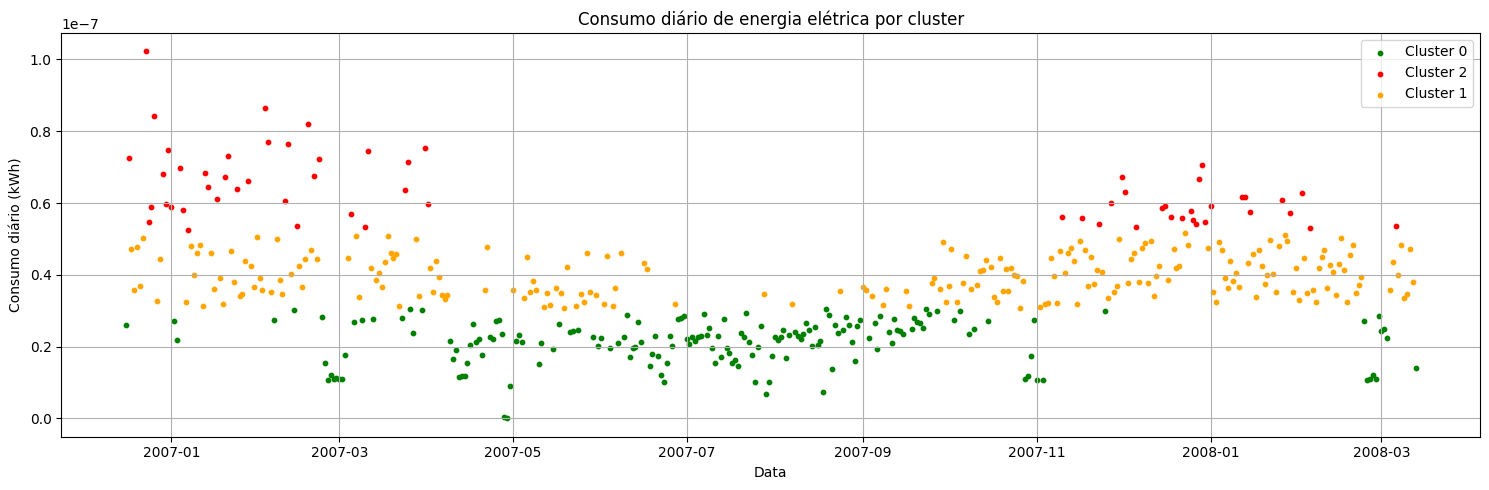

In [ ]:
import matplotlib.pyplot as plt


cores = {0: "green", 1: "orange", 2: "red"}

plt.figure(figsize=(15,5))
for cluster in energia_diaria_scaled["Cluster"].unique():
    subset = energia_diaria_scaled[energia_diaria_scaled["Cluster"] == cluster]
    plt.scatter(subset["data"], subset["Global_active_energy"],
                color=cores[cluster], label=f"Cluster {cluster}", s=10)

plt.xlabel("Data")
plt.ylabel("Consumo diário (kWh)")
plt.title("Consumo diário de energia elétrica por cluster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretação dos resultados:**

Analisando os clusters criados, é possível concluir que existem três grupos bem claros no consumo de energia. O cluster 0, representa o grupo que menos consome, e como visto no gráfico, esse grupo é representativo durante todas as épocas do ano. O cluster 1, é alinhado a um consumo elétrico baixo a médio, também presente durante todas as épocas. Já o cluster 2, representa um grupo com consumo elétrico alto, mais bem alocado durante épocas de inverno (hemisfério norte).

**19- Realizando a decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal (modelo aditivo)
decomposition = seasonal_decompose(daily_energy, model='additive', period=7)

# Acessar os componentes
tendencia = decomposition.trend
sazonalidade = decomposition.seasonal
residuo = decomposition.resid

# Mostrar os primeiros valores de cada componente
print("Tendência:")
print(tendencia.head())
print("\nSazonalidade:")
print(sazonalidade.head())
print("\nResíduo:")
print(residuo.head())

Tendência:
Datetime
2007-01-01             NaN
2007-01-02             NaN
2007-01-03             NaN
2007-01-04    4.580966e-08
2007-01-05    4.425529e-08
Name: trend, dtype: float64

Sazonalidade:
Datetime
2007-01-01   -3.105830e-09
2007-01-02   -5.684039e-09
2007-01-03    2.667137e-09
2007-01-04   -3.476908e-09
2007-01-05   -6.678073e-09
Name: seasonal, dtype: float64

Resíduo:
Datetime
2007-01-01             NaN
2007-01-02             NaN
2007-01-03             NaN
2007-01-04    2.752776e-08
2007-01-05    2.057959e-08
Name: resid, dtype: float64


**20- Treinando um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avaliação de erro do modelo**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"], errors="coerce")


df_reg = df.dropna(subset=["Global_active_power", "Global_intensity"])


X = df_reg[["Global_intensity"]]
y = df_reg["Global_active_power"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente (slope):", model.coef_[0])
print("Intercepto:", model.intercept_)
print("\nAvaliação do modelo:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² score: {r2:.4f}")

Coeficiente (slope): 3.043975019293949e-10
Intercepto: -1.082081169557308e-11

Avaliação do modelo:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R² score: 0.9982


### **Parte 2**

21- Séries temporais por hora

In [ ]:
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"],
                               format="%d/%m/%Y %H:%M:%S",
                               errors="coerce")

In [ ]:
df = df.set_index("datetime")

In [ ]:
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")

In [ ]:
consumo_horario = df["Global_active_power"].resample("1H").mean()

/tmp/ipython-input-1806007395.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  consumo_horario = df["Global_active_power"].resample("1H").mean()


In [ ]:
consumo_por_hora = consumo_horario.groupby(consumo_horario.index.hour).mean()
print(consumo_por_hora)

datetime
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64


22- Autocorrelação do consumo

In [ ]:
serie = df["Global_active_power"].astype(float).dropna()
serie = serie.loc["2007-01-01":"2007-12-31"]

def autocorr_lag(series, lag):
   return series.autocorr(lag=lag)

lag_1h = 60
lag_24h = 60 * 24
lag_48h = 60 * 48
print("Autocorrelação (1h):", autocorr_lag(serie, lag_1h))
print("Autocorrelação (24h):", autocorr_lag(serie, lag_24h))
print("Autocorrelação (48h):", autocorr_lag(serie, lag_48h))

Autocorrelação (1h): 0.5156747114170083
Autocorrelação (24h): 0.33731052489100266
Autocorrelação (48h): 0.3060878803162379


**Exitem padrões repetidos diariamente?**

Sim, o consumo apresenta padrões diários, ou seja, a autocorrelação em 24h e 48h tende a ser bem mais alta que em 1h. Isso indica repetição de comportamento de consumo de energia ao longo dos dias.

23- Redução de dimensionalidade com PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_cols = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_clean = df[num_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[num_cols])

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada:" , pca.explained_variance_ratio_)

Variância explicada: [0.59103759 0.22718543]


24- Visualização de clusters no espaço PCA

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_pca)

In [ ]:
sil = silhouette_score(X_pca, labels, sample_size=100000, random_state=42)
print(f"Silhouette Score (k=3): {sil:.3f}")

Silhouette Score (k=3): 0.368


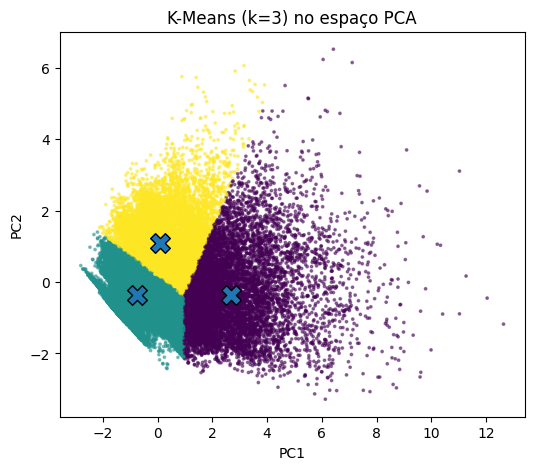

In [ ]:
import numpy as np

plt.figure(figsize=(6,5))

idx = np.random.RandomState(42).choice(len(X_pca), size=min(60000, len(X_pca)), replace=False)
plt.scatter(X_pca[idx,0], X_pca[idx,1], c=labels[idx], s=3, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means (k=3) no espaço PCA")
plt.show()

**Os grupos se separam de forma clara?**





25- Regressão polinomial vs linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
df = df[["Global_active_power", "Voltage"]].dropna()

In [ ]:
df["Global_active_power"] = df["Global_active_power"].astype(float)
df["Voltage"] = df["Voltage"].astype(float)

In [ ]:
X = df[["Voltage"]].values
y = df["Global_active_power"].values

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

In [ ]:
print("RMSE Regressão Linear Simples:", rmse_linear)
print("RMSE Regressão Polinomial (grau 2):", rmse_poly)

RMSE Regressão Linear Simples: 1.0617897022422802
RMSE Regressão Polinomial (grau 2): 1.0601478647282845


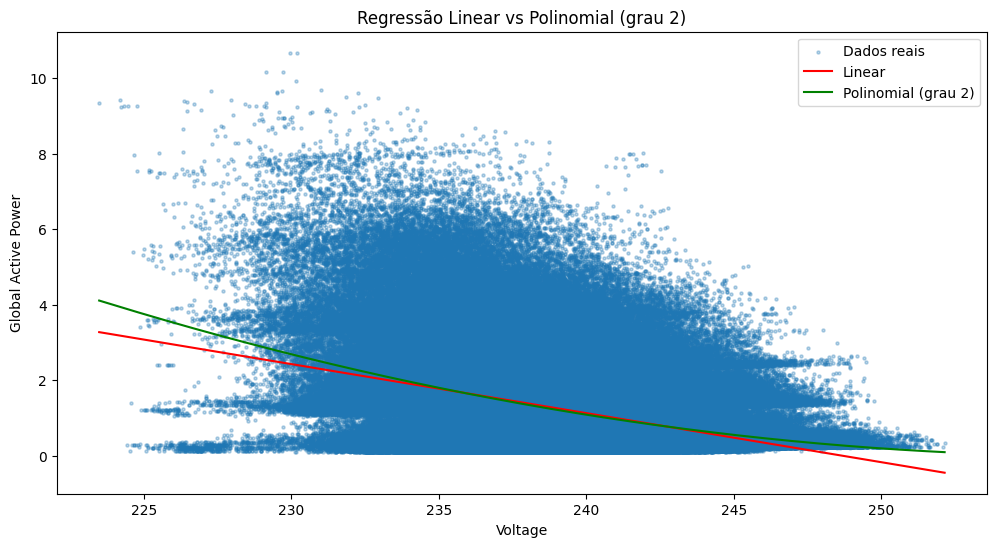

In [ ]:
sort_idx = np.argsort(X[:,0])
X_sorted = X[sort_idx]
y_pred_linear_sorted = y_pred_linear[sort_idx]
y_pred_poly_sorted = y_pred_poly[sort_idx]

plt.figure(figsize=(12,6))
plt.scatter(X, y, s=5, alpha=0.3, label="Dados reais")
plt.plot(X_sorted, y_pred_linear_sorted, color="red", label="Linear")
plt.plot(X_sorted, y_pred_poly_sorted, color="green", label="Polinomial (grau 2)")
plt.xlabel("Voltage")
plt.ylabel("Global Active Power")
plt.title("Regressão Linear vs Polinomial (grau 2)")
plt.legend()
plt.show()

### **Parte 3**

Uso do novo dataset Appliances Energy Prediction

Dataset: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

Trata-se de um dataset que mede o consumo de energia elétrica dentro de uma residência, considerando fatores internos (temperatura, umidade, clima) e externos (clima).

**26- Carregamento e inspeção inicial**

In [ ]:
import pandas as pd

Carregamento inicial:

In [ ]:
dados = pd.read_csv("energydata_complete.csv", sep= ",")
dados.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Obtendo informações sobre o dataset:

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
dados.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Verificando se há dados nulos:

In [ ]:
dados_nulos = dados.isnull().sum()
print(dados_nulos)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


**27 - Analisando a distribuição do consumo**

Criação de um histograma para analisar os dados da variável Appliances (consumo de energia)

In [ ]:
import matplotlib.pyplot as plt

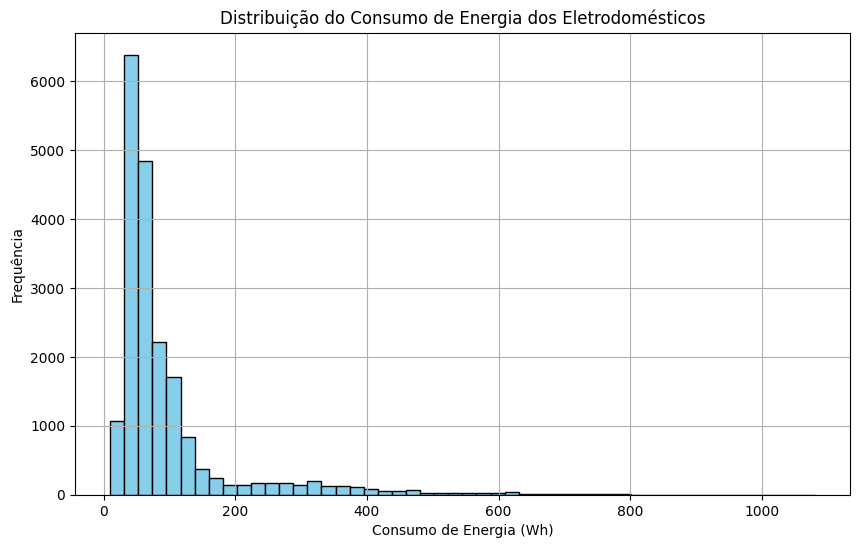

In [ ]:
plt.figure(figsize=(10, 6))
dados['Appliances'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do Consumo de Energia dos Eletrodomésticos')
plt.xlabel('Consumo de Energia (Wh)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Criação de séries temporais para a variável Appliances

Série temporal de Consumo Diário

In [ ]:
# Convertendo a coluna date

dados["date"] = pd.to_datetime(dados["date"])

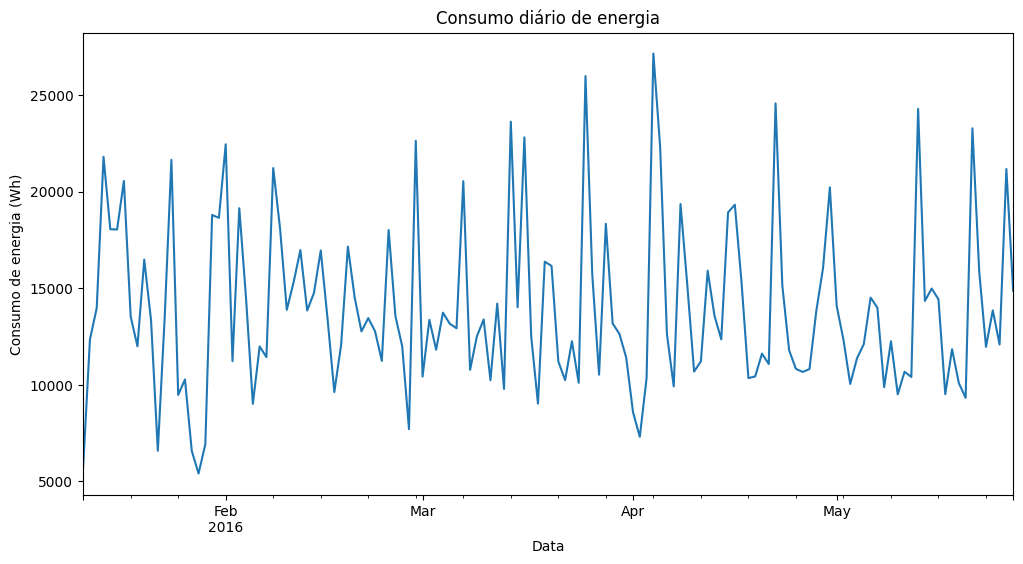

In [ ]:
dados.set_index('date', inplace = True)

appliances_diario = dados["Appliances"].resample('D').sum()


plt.figure(figsize=(12,6))
appliances_diario.plot()
plt.title('Consumo diário de energia')
plt.xlabel('Data')
plt.ylabel('Consumo de energia (Wh)')
plt.show()

Série temporal de Consumo Mensal

/tmp/ipython-input-3725687543.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  appliances_horario = dados["Appliances"].resample('M').sum()


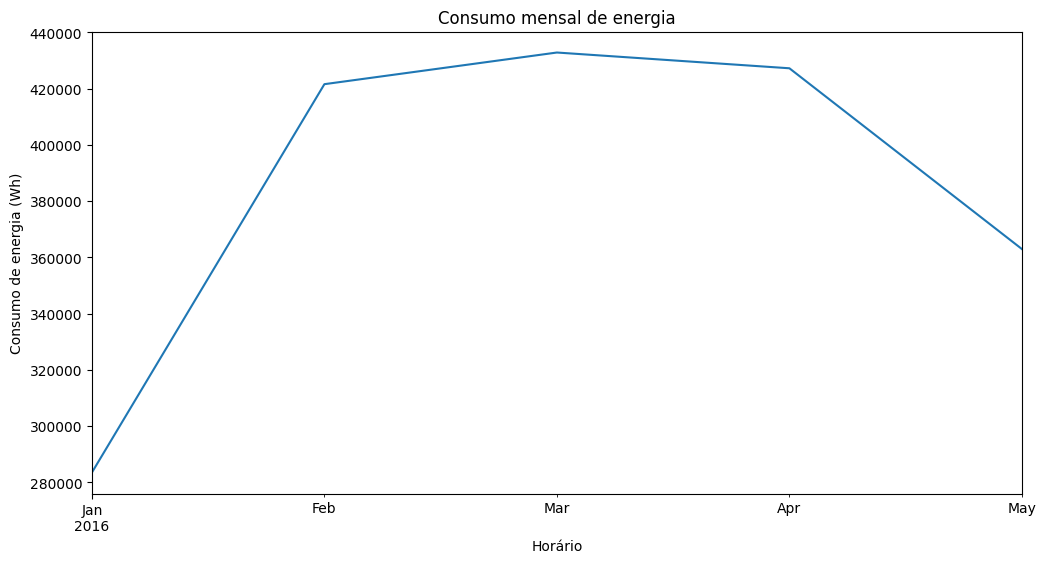

In [ ]:
appliances_horario = dados["Appliances"].resample('M').sum()

plt.figure(figsize=(12,6))
appliances_horario.plot()
plt.title('Consumo mensal de energia')
plt.xlabel('Horário')
plt.ylabel('Consumo de energia (Wh)')
plt.show()

**Pergunta: O consumo tende a se concentrar em valores baixos ou altos?**

O consumo de energia tende a se concentrar em valores altos, com algumas oscilações em determinados períodos do tempo analisado.

**28 - Correlações com variáveis ambientais**

Analisando correlação do Consumo de Energia com outras variáveis de ambiente presentes no dataset

In [ ]:
dados_numericos = dados.select_dtypes(include=['float64', 'int64'])
correlacoes = dados_numericos.corr()["Appliances"].sort_values(ascending=False)
print(correlacoes)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


**Interpretação das correlações: Quais fatores têm mais relação com o consumo?**

Dentre as variáveis analisadas, observa-se que a variável "lights" é a que tem mais correlação com o consumo de energia, essa variável representa o Consumo de Energia com Iluminação. Seguida por variáveis como "T2"e "T6" (Temperatura interna), "T_out" (Temperatura externa ao ambiente) e "Windspeed" (Velocidade do vento).

Todas as variáveis iniciadas por "T" são de temperatura, e por "R" são de umidade do ambiente analisado.

**29- Normalização dos dados**

Normalizando os dados das colunas numéricas para reutiliza-los na criação de modelos posteriores

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()


df_scaled = pd.DataFrame(scaler.fit_transform(dados_numericos))


print(df_scaled.head())

         0         1        2         3         4         5         6   \
0  0.046729  0.428571  0.32735  0.566187  0.225345  0.684038  0.215188   
1  0.046729  0.428571  0.32735  0.541326  0.225345  0.682140  0.215188   
2  0.037383  0.428571  0.32735  0.530502  0.225345  0.679445  0.215188   
3  0.037383  0.571429  0.32735  0.524080  0.225345  0.678414  0.215188   
4  0.046729  0.571429  0.32735  0.531419  0.225345  0.676727  0.215188   

         7         8         9   ...        18        19        20        21  \
0  0.746066  0.351351  0.764262  ...  0.223032  0.677290  0.372990  0.097674   
1  0.748871  0.351351  0.782437  ...  0.226500  0.678532  0.369239  0.100000   
2  0.755569  0.344745  0.778062  ...  0.219563  0.676049  0.365488  0.102326   
3  0.758685  0.341441  0.770949  ...  0.219563  0.671909  0.361736  0.104651   
4  0.758685  0.341441  0.762697  ...  0.219563  0.671909  0.357985  0.106977   

         22        23        24        25        26        27  
0  0.89473

**30- PCA**

Aplicando PCA e reduzindo para 2 componentes principais

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(df_pca.head())

        PC1       PC2
0  0.723991  0.596281
1  0.724805  0.592120
2  0.728731  0.577034
3  0.743361  0.566725
4  0.734231  0.562557


In [ ]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância total explicada pelos dois componentes:", sum(pca.explained_variance_ratio_))

Variância explicada por cada componente: [0.36089668 0.20905617]
Variância total explicada pelos dois componentes: 0.5699528502350534


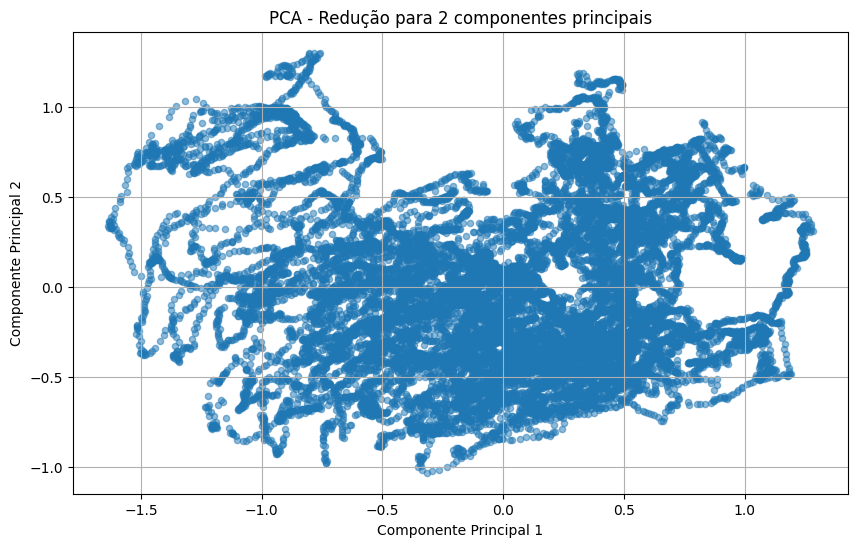

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=20)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Redução para 2 componentes principais')
plt.grid(True)
plt.show()

**Aparecem padrões ou agrupamentos naturais?**

**31- Regressão Linear Múltipla**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
env_features = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
                'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8',
                'T9', 'RH_9', 'T_out', 'RH_out', 'Press_mm_hg', 'Windspeed',
                'Visibility', 'Tdewpoint', 'lights', 'rv1', 'rv2']


X = dados[env_features]
y = dados['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'Erro Médio Absoluto (MAE): {mae:.4f}')

R²: 0.1693
Erro Médio Absoluto (MAE): 52.5477


**Avaliação do modelo:**

Quando analisado os resultados do R2, compreende-se que o modelo consegue identificar que apenas 17% do consumo é explicado pelas variações ambientais.

Quanto ao MAE, o erro médio é relativamente grande, o que possibilita chegar a conclusão de que o modelo não é confiável para previsões precisas.

**32- Random Forest Regressor**

Treinando um modelo de Random Forest Regressor para prever Appliances

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dados[env_features]  # variáveis independentes
y = dados['Appliances']  # variável dependente

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f} Wh')
print(f'R²: {r2:.4f}')
print(f'Erro Médio Absoluto (MAE): {mae:.4f} Wh')

Root Mean Squared Error (RMSE): 68.4343 Wh
R²: 0.5320
Erro Médio Absoluto (MAE): 32.7965 Wh


**Interpretação do modelo: Comparação com o modelo de regressão linear múltipla**

De acordo com os resultados das avaliações de erro, percebe-se que o Random Forest Regressor melhorou muito em relação à regressão linear.

O modelo agora explica 53% da variação do consumo de aparelhos, muito melhor do que os 17% da regressão linear.

Analisando o MAE, em média o modelo erra cerca de 33 Wh por previsão, menor que o MAE do modelo linear.

Já quanto ao RMSE, ele é maior do que o MAE do modelo linear, pois penaliza erros grandes.


**33- K-Means clustering**


Aplicando K-Means com

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dados["cluster_3"] = kmeans.fit_predict(df_scaled)


cluster_perfis = dados.groupby("cluster_3")[["Appliances","lights","T1","RH_1","T_out","RH_out"]].mean()
print(cluster_perfis)

           Appliances    lights         T1       RH_1      T_out     RH_out
cluster_3                                                                  
0          108.024792  2.332409  23.333507  41.258084  13.139939  69.581716
1           91.133288  3.704330  20.990402  37.800637   3.881554  82.225380
2           96.608953  5.886824  20.858080  43.571917   6.606127  88.280053


**Interpretação dos perfis de consumo:**

Cluster 0 = Períodos de alto consumo de energia devido ao uso de aparelhos elétricos, consumo de lux baixo/moderado, temperatura interna controlada, o que pode indicar maior uso de ar-condicionado/aquecedor.

Cluster 1 = Consumo menor de aparelhos, mas muita iluminação ligada, ambiente interno mais frio, mas umidade externa alta. Representa residências que economizam nos aparelhos mas dependem de iluminação interna.

Cluster 2 = Períodos com uso moderado de aparelhos, mas também com muita iluminação ligada, temperatura interna baixa, indicando pouco uso de ar-condicionado/aquecedor e ambiente externo frio e úmido, o que influencia o consumo interno de luz.

**34- Classificação binária**

Analisando Appliances com criação de uma variável: alto vs baixo consumo

In [ ]:
mediana_appliances = dados['Appliances'].median()

print(f"Mediana de Appliances: {mediana_appliances:.2f} Wh")

Mediana de Appliances: 60.00 Wh


0 -> baixo consumo (<= mediana de appliances)

1 -> alto consumo (>= mediana de appliances)

In [ ]:
dados['consumo_binario'] = (dados['Appliances'] > mediana_appliances).astype(int)
print("Contagem por classificação de consumo: ")
print(dados['consumo_binario'].value_counts())

Contagem por classificação de consumo: 
consumo_binario
0    10744
1     8991
Name: count, dtype: int64


Treinando Logistic Regression e Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = dados[['lights', 'T1', 'RH_1', 'T_out', 'RH_out']]
y = dados['consumo_binario']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Gerando matriz de confuão e métricas

In [ ]:
y_pred_logreg = logreg.predict(X_test_scaled)


print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Accuracy: 0.6959972977537578
Confusion Matrix:
 [[2565  658]
 [1142 1556]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      3223
           1       0.70      0.58      0.63      2698

    accuracy                           0.70      5921
   macro avg       0.70      0.69      0.69      5921
weighted avg       0.70      0.70      0.69      5921



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Treinar
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Gerando matriz de confusão e métricas

In [ ]:
y_pred_rf = rf.predict(X_test)


print("=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

=== Random Forest Classifier ===
Accuracy: 0.8508697855092046
Confusion Matrix:
 [[2832  391]
 [ 492 2206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      3223
           1       0.85      0.82      0.83      2698

    accuracy                           0.85      5921
   macro avg       0.85      0.85      0.85      5921
weighted avg       0.85      0.85      0.85      5921



**35- Avaliação e classificação**

Gerando matriz de confusão e métricas dos modelos criados já feitas

**O modelo erra mais para alto ou para baixo consumo?**

Ao analisar os modelos, vemos que ambos erram mais ao prever alto consumo (consumo_binario = 1). Na Logistic Regression, apenas 58% dos altos consumos foram corretamente identificados, enquanto 80% dos baixos consumos foram acertados, mostrando que o modelo tende a confundir registros de alto consumo com baixo. Já o Random Forest melhora bastante, acertando 82% dos altos consumos e 88% dos baixos, mas ainda apresenta um pouco mais de erro para alto consumo. Em resumo, ambos os modelos têm maior dificuldade em prever alto consumo, mas o Random Forest é mais robusto e equilibrado.